In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Cardiotocographic.csv')

In [3]:
# Display basic info and check for missing values
print(data.info())
print(data.isnull().sum())

# Display the first few rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int6

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# Impute missing values with column means (alternative: median or mode)
data.fillna(data.mean(), inplace=True)

In [6]:
# Example: Ensure all columns are in the correct format
data = data.apply(pd.to_numeric, errors='coerce')

In [7]:
# Example of detecting outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_outliers_removed = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
# Summary statistics for each column
summary_stats = data.describe().T
summary_stats[['mean', '50%', 'std', 'min', 'max', '25%', '75%']]

,mean,50%,std,min,max,25%,75%
LB,133.343598,133.000000,11.214328,51.842487,214.000000,126.000000,140.000000
AC,0.003219,0.001668,0.004370,-0.019284,0.038567,0.000000,0.005606
FM,0.009894,0.000000,0.067540,-0.480634,0.961268,0.000000,0.002567
UC,0.004391,0.004484,0.003340,-0.014925,0.030002,0.001851,0.006536
DL,0.001895,0.000000,0.003343,-0.015393,0.030769,0.000000,0.003289
DS,0.000003,0.000000,0.000141,-0.001353,0.002706,0.000000,0.000000
DP,0.000175,0.000000,0.000836,-0.005348,0.010695,0.000000,0.000000
ASTV,46.995984,49.000000,18.813973,-63.000000,162.000000,32.000000,61.000000
MSTV,1.364378,1.200000,1.173632,-6.600000,13.800000,0.700000,1.700000
ALTV,10.285964,0.000000,21.205041,-91.000000,182.000000,0.000000,11.000000


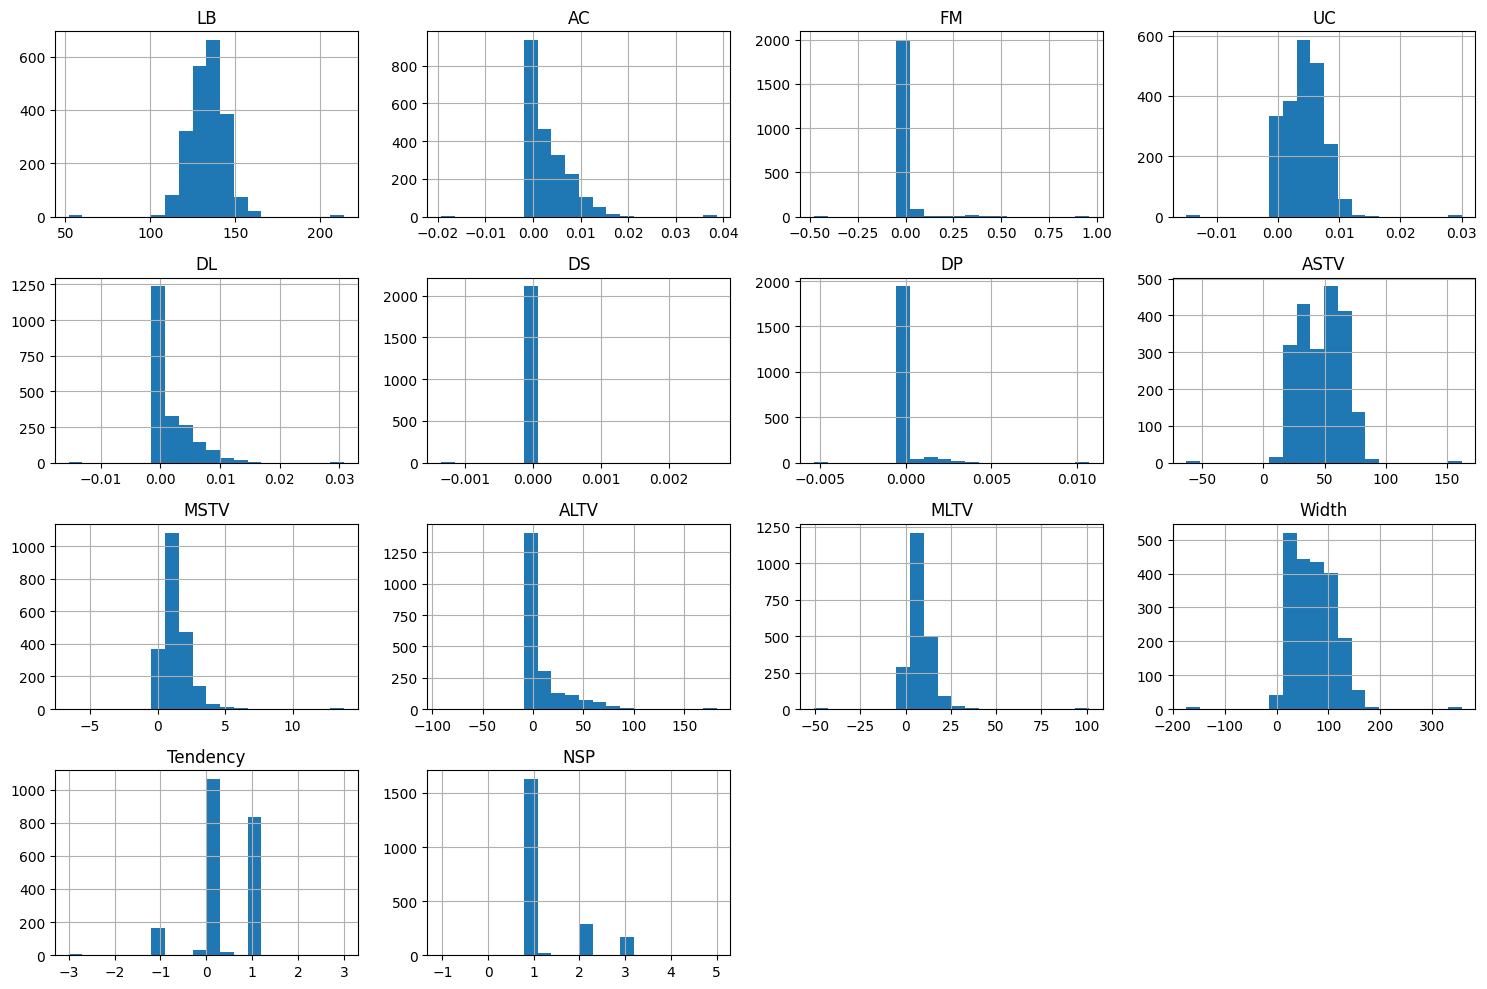

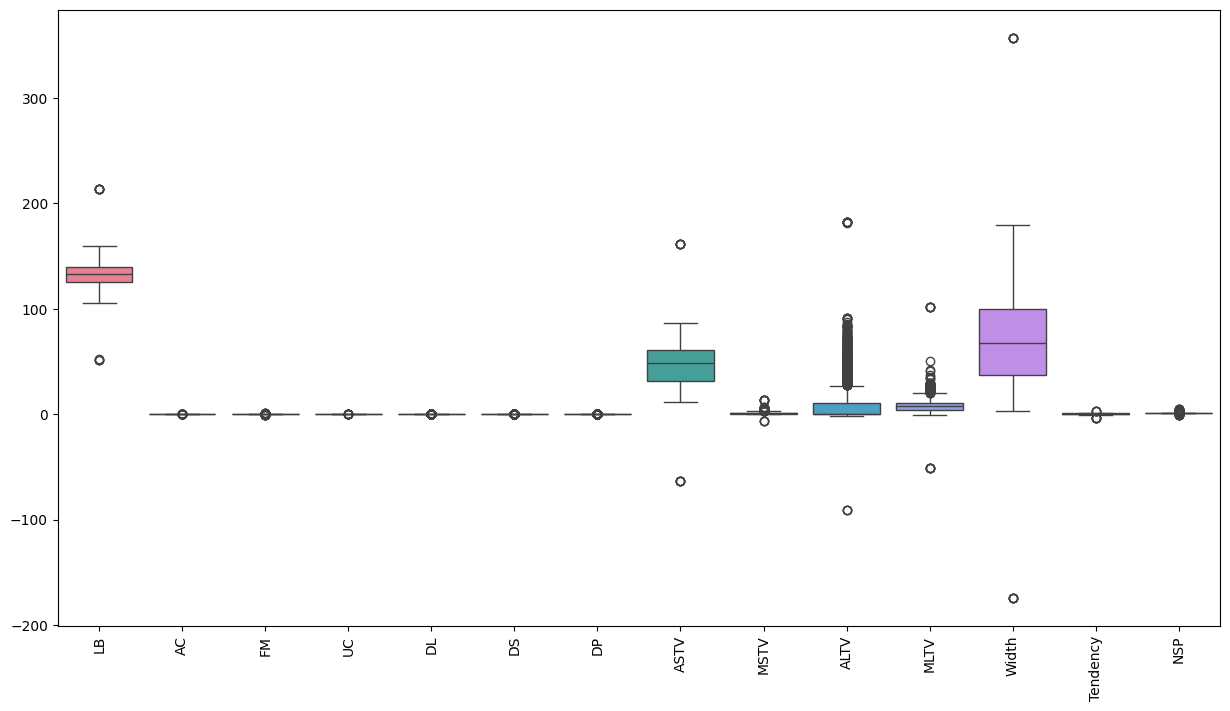

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each column
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

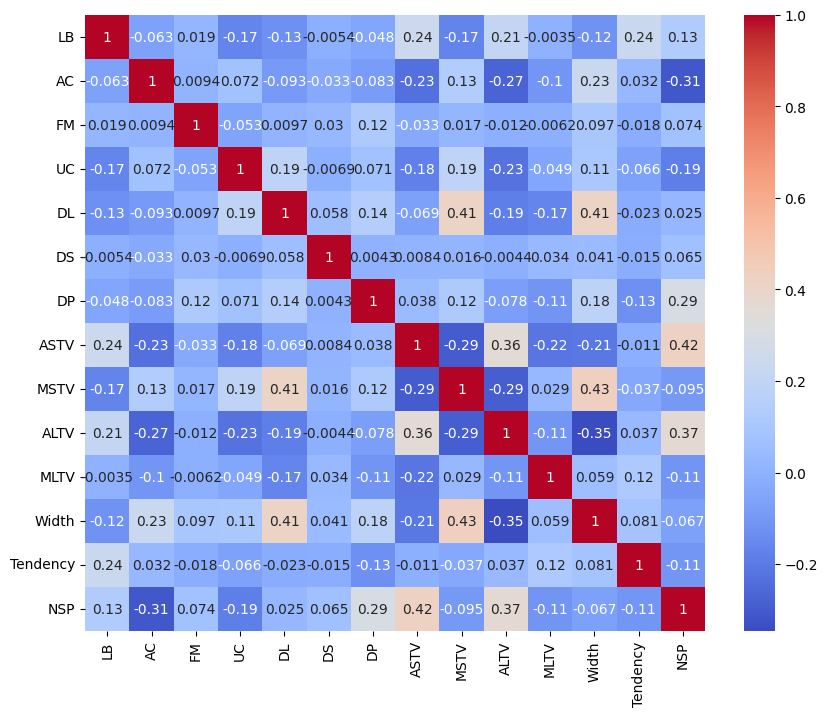

In [10]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

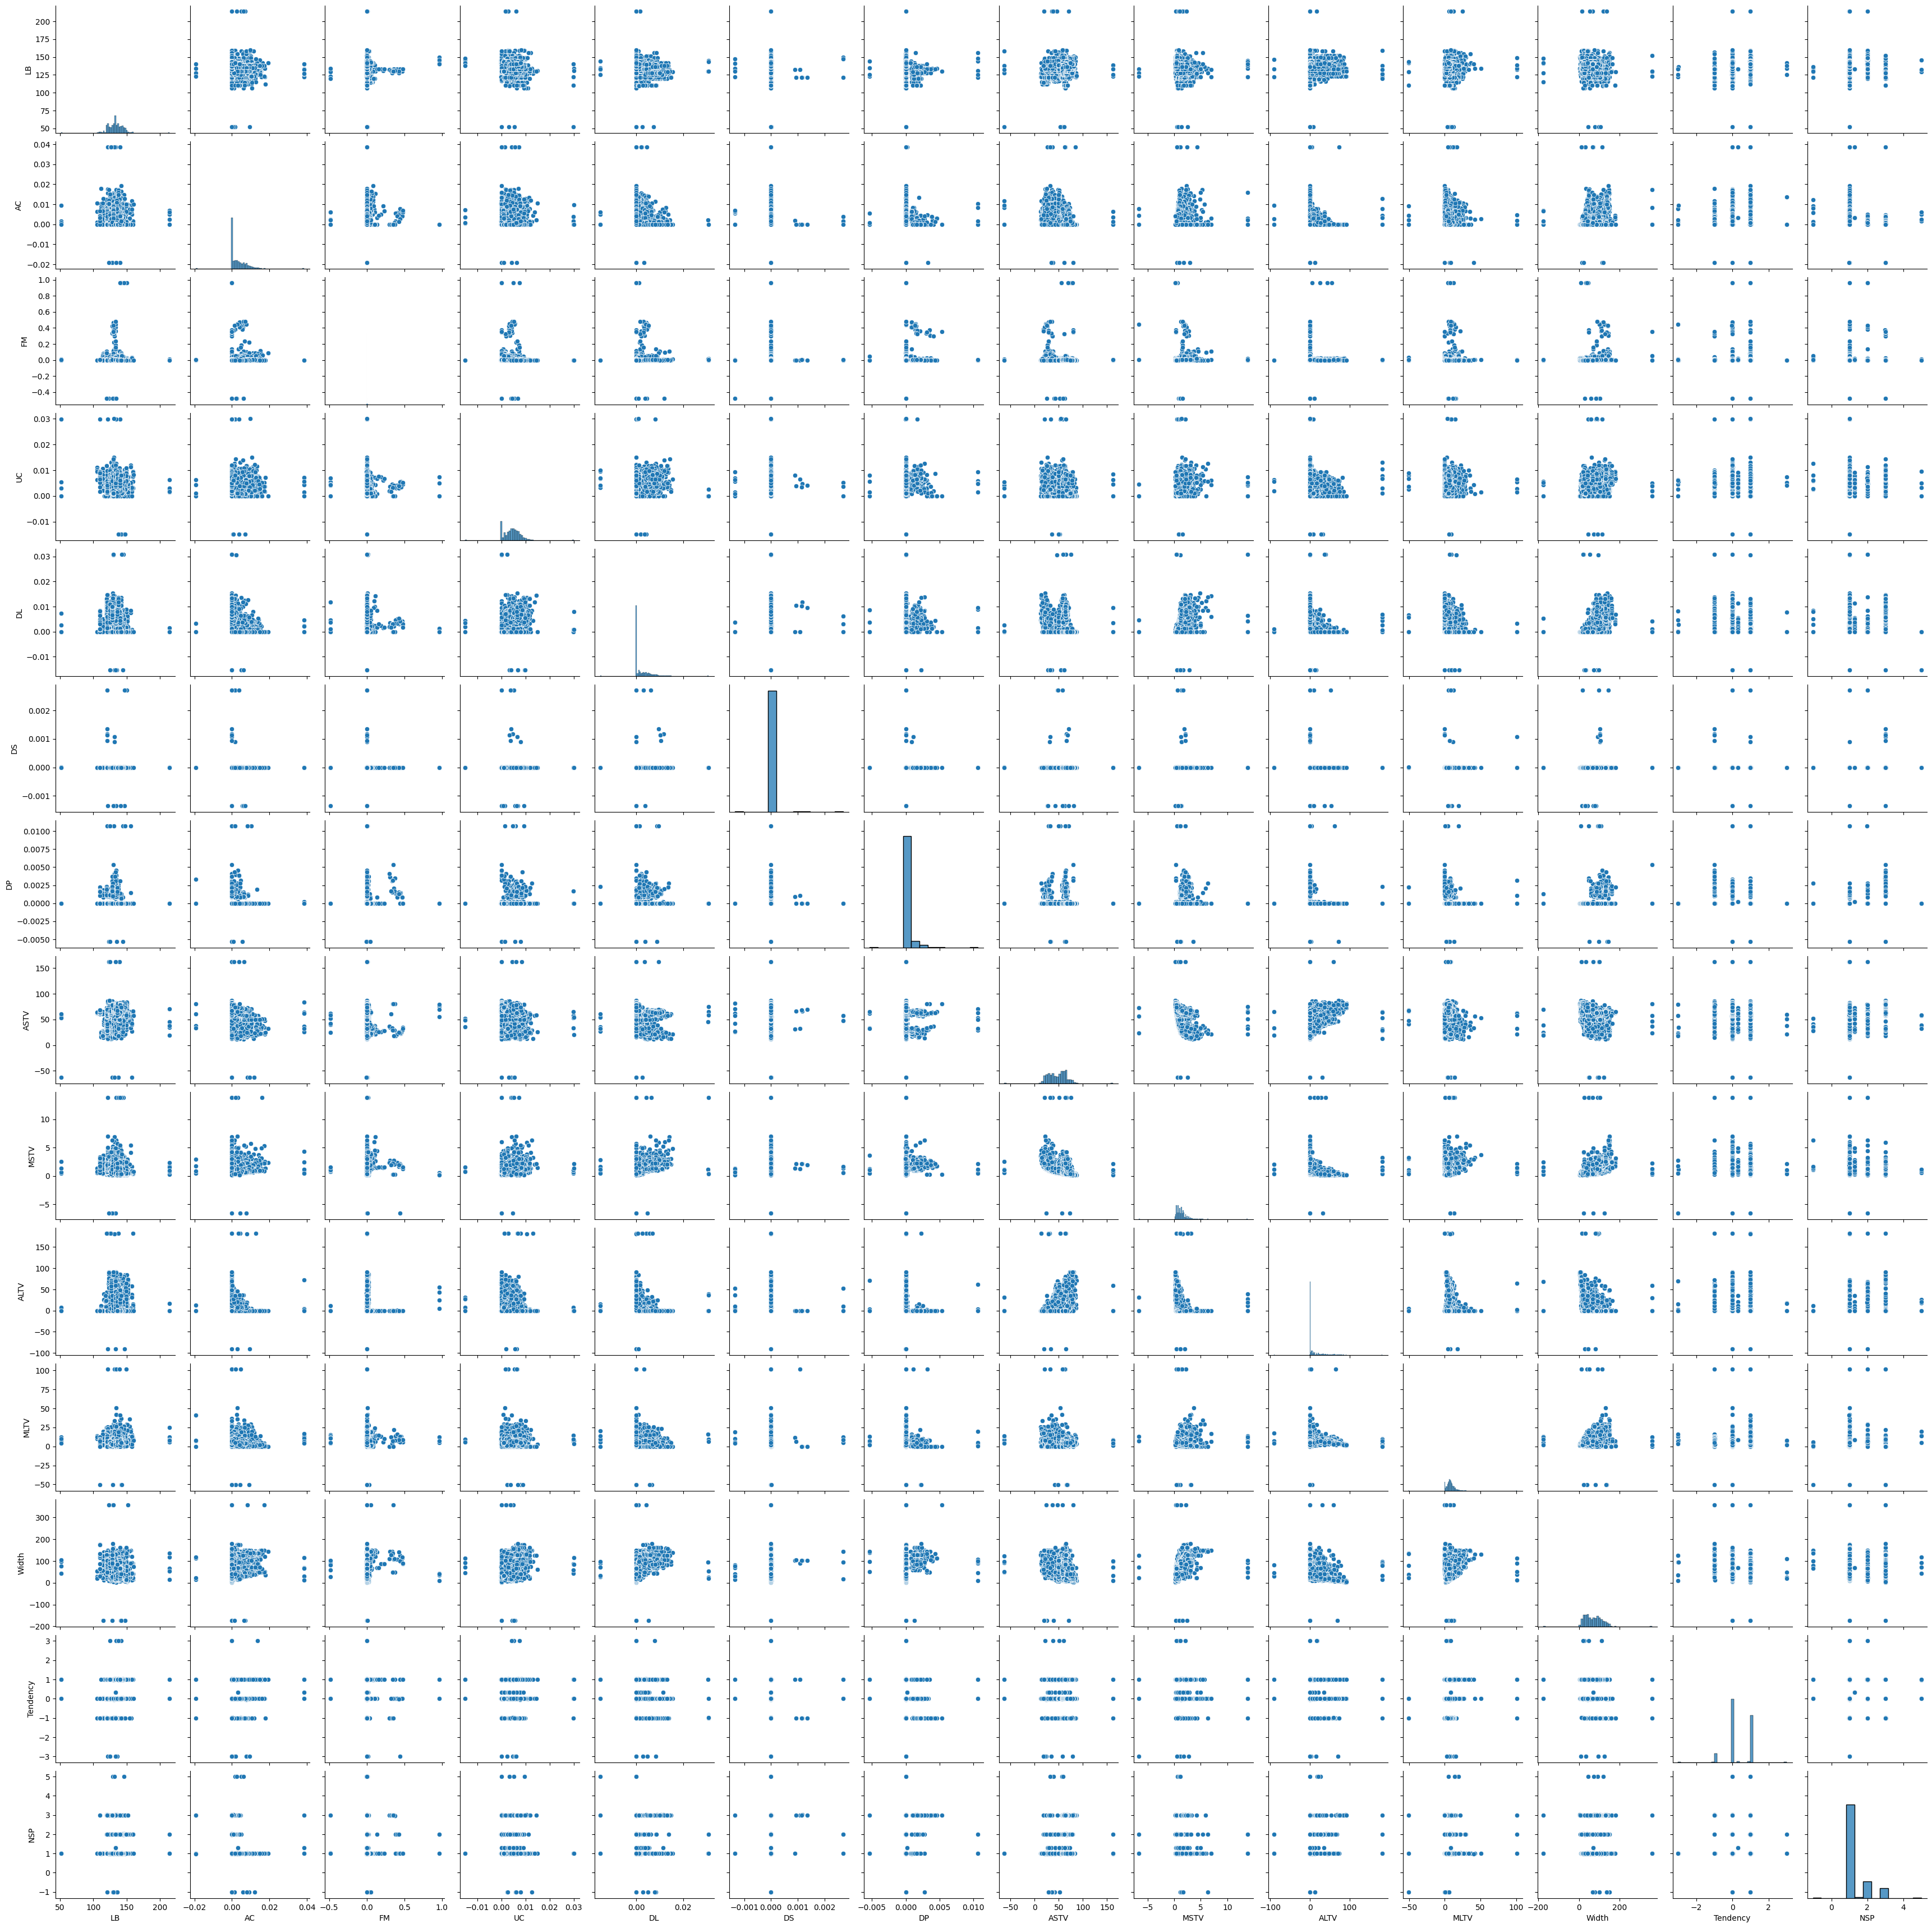

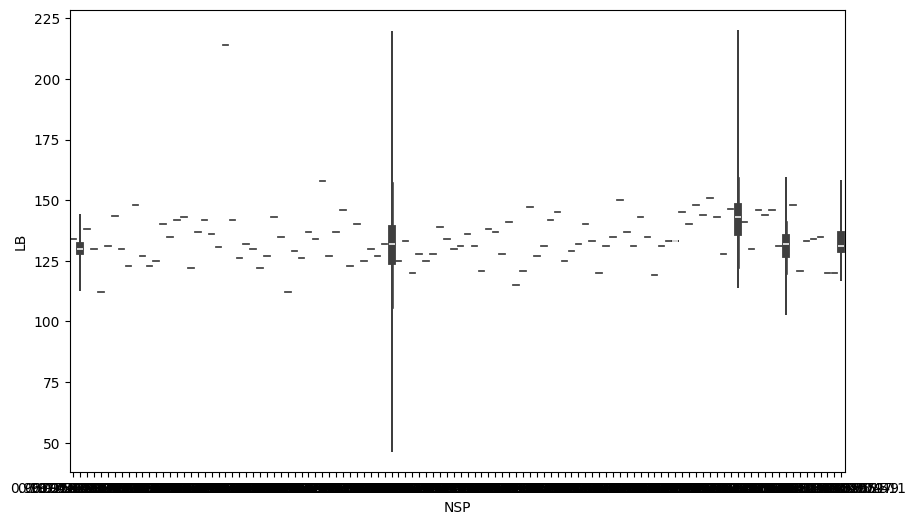

In [11]:
# Pair plot
sns.pairplot(data)
plt.show()

# Violin plot example
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='NSP', y='LB')
plt.show()

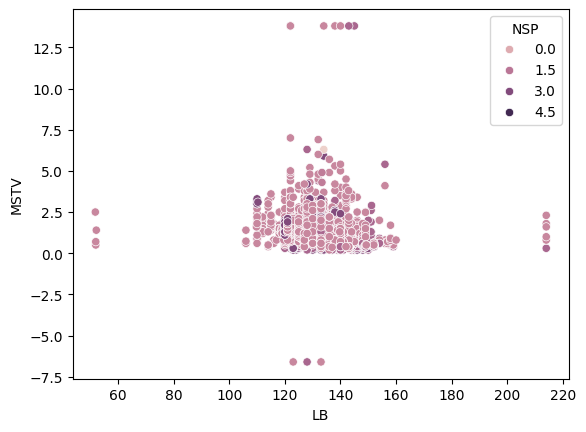

In [12]:
# Example: Exploring relationship between LB and other variables
sns.scatterplot(data=data, x='LB', y='MSTV', hue='NSP')
plt.show()